#### Importing the necessary libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset into a dataframe

In [31]:
df = pd.read_stata(r"C:\Users\Tarun's\Downloads\ED2013-stata (2).dta", convert_categoricals=False, convert_missing=True)
# Display the first few rows of the dataset to understand its structure
print(df.head())

   VMONTH  VDAYR ARRTIME  WAITTIME  LOV  AGE  AGER  AGEDAYS  RESIDNCE  SEX  \
0       1      3    0647        33   58   46     4       -7         1    2   
1       1      3    1841       109  150   56     4       -7         1    2   
2       1      3    1333        84  198   37     3       -7         1    2   
3       1      3    1401       159  276    7     1       -7         1    1   
4       1      4    1947       114  248   53     4       -7         1    1   

   ...  RX12V3C1  RX12V3C2  RX12V3C3  RX12V3C4  SETTYPE  YEAR   CSTRATM  \
0  ...                                                3  2013  20113201   
1  ...                                                3  2013  20113201   
2  ...                                                3  2013  20113201   
3  ...                                                3  2013  20113201   
4  ...                                                3  2013  20113201   

    CPSUM  PATWT  EDWT  
0  100020   2945     .  
1  100020   2945     .  
2  10

## Checking for missing values and looking at the main variable WAITTIME

In [32]:
# Check for missing values
print("Missing values")
print(df.isnull().sum())

# drop missing values
df = df.dropna()

# Summarize key statistics of the "WAITTIME" variable
print("\nWAITTIME Variable")
print(df['WAITTIME'].describe())

Missing values
VMONTH      0
VDAYR       0
ARRTIME     0
WAITTIME    0
LOV         0
           ..
YEAR        0
CSTRATM     0
CPSUM       0
PATWT       0
EDWT        0
Length: 591, dtype: int64

WAITTIME Variable
count    24777.000000
mean        36.382694
std         70.247818
min         -9.000000
25%          4.000000
50%         17.000000
75%         43.000000
max       1227.000000
Name: WAITTIME, dtype: float64


//Relationships between the features

## WAITTIME Across Racial Groups

ANOVA p-value: 3.265762236919293e-32


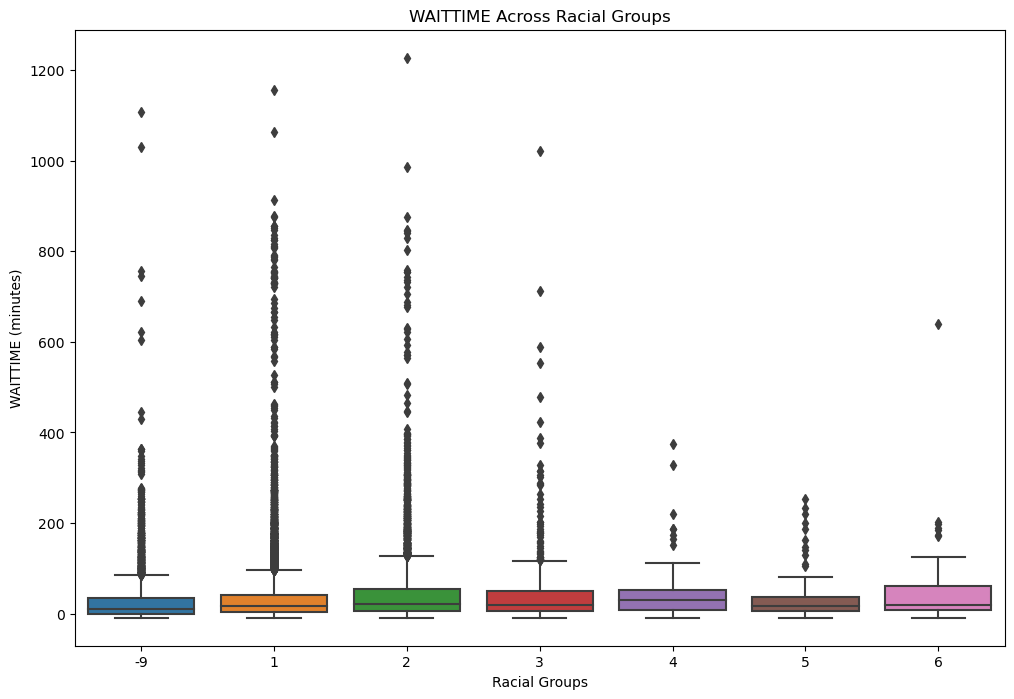

In [33]:
from scipy.stats import f_oneway

# Compare "WAITTIME" across different racial groups using ANOVA
racial_groups = df['RACEUN'].unique()
waittime_by_race = [df[df['RACEUN'] == race]['WAITTIME'] for race in racial_groups]

# Perform ANOVA
anova_result = f_oneway(*waittime_by_race)
print('ANOVA p-value:', anova_result.pvalue)

# Visualize the distribution of wait times for different racial groups using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='RACEUN', y='WAITTIME', data=df)
plt.title('WAITTIME Across Racial Groups')
plt.xlabel('Racial Groups')
plt.ylabel('WAITTIME (minutes)')
plt.show()

## WAITTIME Across the months

ANOVA p-value: 3.7989063474385076e-17


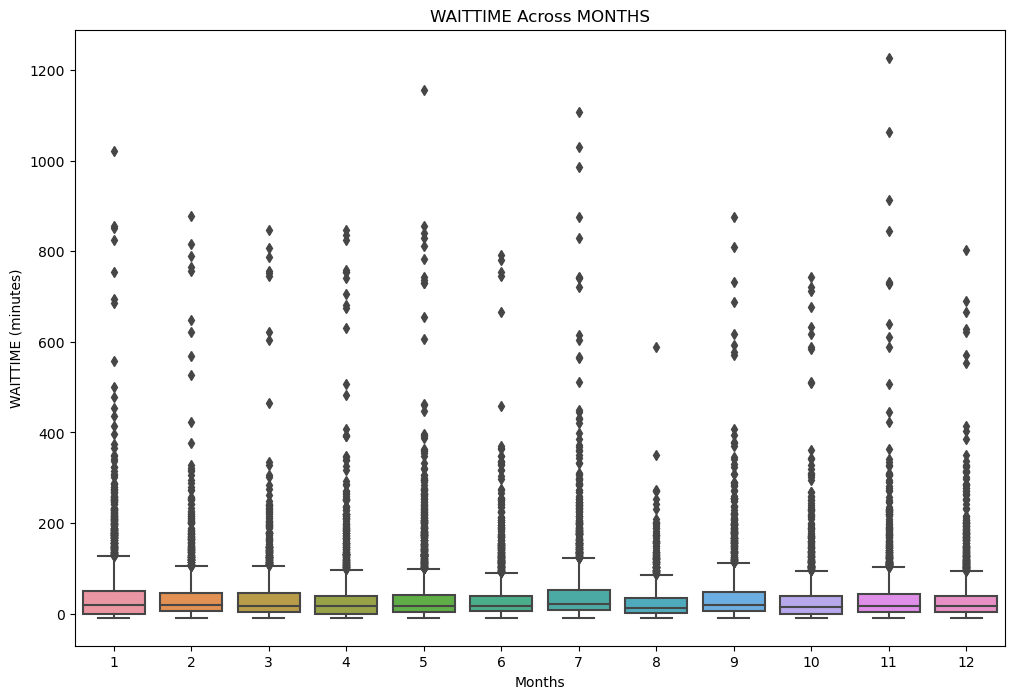

In [34]:
months = df['VMONTH'].unique()
waittime_by_month = [df[df['VMONTH'] == month]['WAITTIME'] for month in months]

# Perform ANOVA
anova_result = f_oneway(*waittime_by_month)
print('ANOVA p-value:', anova_result.pvalue)

# Visualize the distribution of wait times for different racial groups using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='VMONTH', y='WAITTIME', data=df)
plt.title('WAITTIME Across MONTHS')
plt.xlabel('Months')
plt.ylabel('WAITTIME (minutes)')
plt.show()

## WAITTIME  distribution and comparison with  PAINSCALE

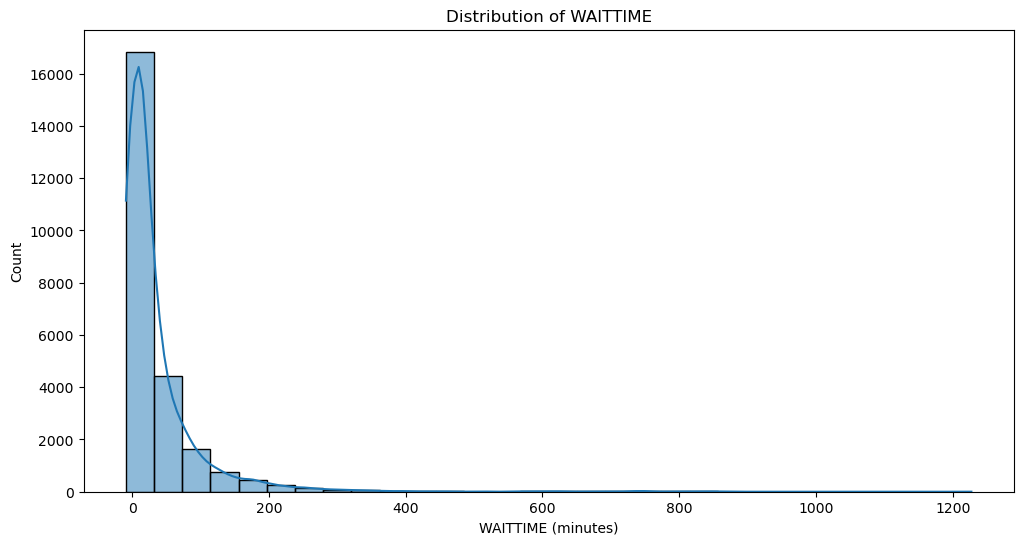

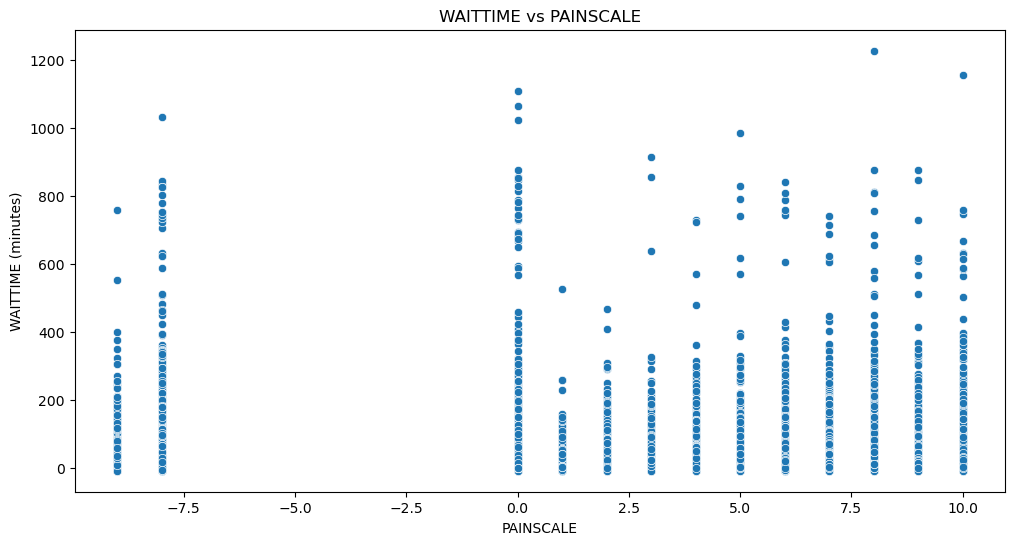

In [35]:
# Histogram of WAITTIME
plt.figure(figsize=(12, 6))
sns.histplot(df['WAITTIME'], bins=30, kde=True)
plt.title('Distribution of WAITTIME')
plt.xlabel('WAITTIME (minutes)')
plt.show()

# Scatter plot to explore the relationship between WAITTIME and another numeric variable
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PAINSCALE', y='WAITTIME', data=df)
plt.title('WAITTIME vs PAINSCALE')
plt.xlabel('PAINSCALE')
plt.ylabel('WAITTIME (minutes)')
plt.show()

## Feature selection and correlations

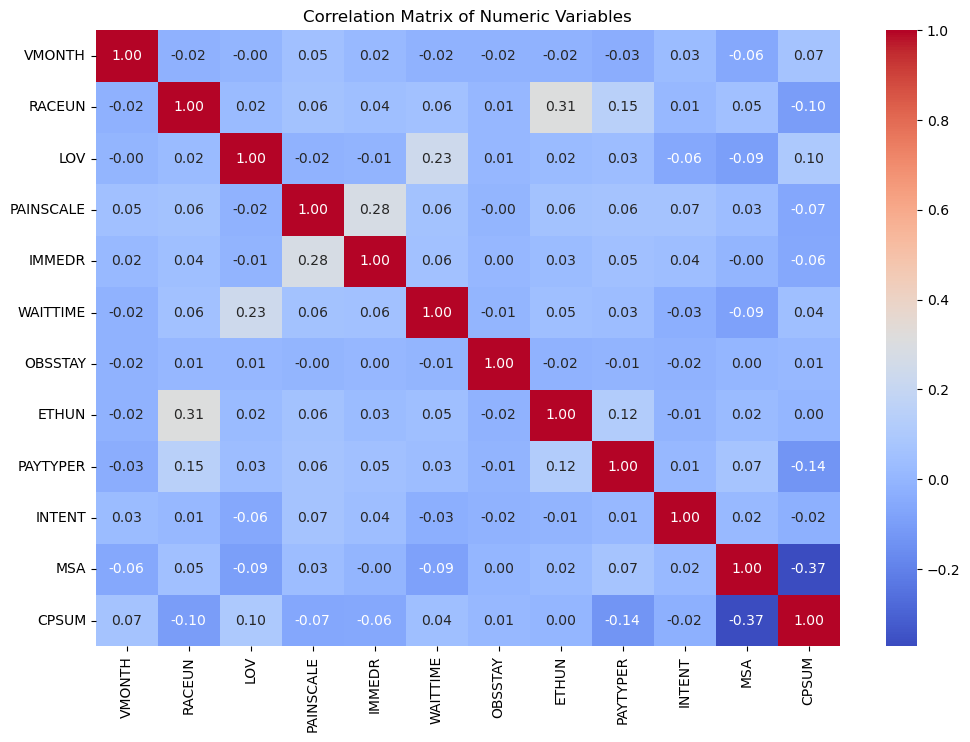

In [36]:
selected_variables = [
    'VMONTH',
    'RACEUN',
    'ARRTIME',
    'LOV',
    'PAINSCALE',
    'IMMEDR',
    'WAITTIME',
    'OBSSTAY',
    'ETHUN',
    'PAYTYPER',
    'INTENT',
    'MSA',
    'CPSUM'
]

df = df[selected_variables]

# Numeric variables: Correlation analysis
numeric_variables = df.select_dtypes(include=['int8','int16', 'int64', 'int32']).columns

if len(numeric_variables) > 0:
    correlation_matrix = df[numeric_variables].corr()

    # Visualize correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.show()
else:
    print("No numeric variables found in the dataset.")


## Dataset splitting

In [39]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

# Categorical variables
categorical_variables = df.select_dtypes(exclude=['int8','int16', 'int64', 'int32']).columns

# Encode categorical variables if needed
df_selected = pd.get_dummies(df, columns=categorical_variables, drop_first=True)


# Prepare data for machine learning
X = df_selected.drop(['WAITTIME'], axis=1)
y = df_selected['WAITTIME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train[:3]

,VMONTH,RACEUN,LOV,PAINSCALE,IMMEDR,OBSSTAY,ETHUN,PAYTYPER,INTENT,MSA,...,ARRTIME_2350,ARRTIME_2351,ARRTIME_2352,ARRTIME_2353,ARRTIME_2354,ARRTIME_2355,ARRTIME_2356,ARRTIME_2357,ARRTIME_2358,ARRTIME_2359
115,1,3,163,4,4,-7,2,-8,-9,1,...,0,0,0,0,0,0,0,0,0,0
9253,6,-9,92,0,5,-7,-9,-9,3,1,...,0,0,0,0,0,0,0,0,0,0
24332,4,2,156,-8,3,-7,2,3,-9,1,...,0,0,0,0,0,0,0,0,0,0


### Modeling and evaluation
Elastic, KNN and Ridge models

In [40]:
# Build linear regression model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error


model = ElasticNet()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae_elastic = mean_absolute_error(y_test, y_pred)
rmse_elastic = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae_elastic}')
print(f'Root Mean Squared Error: {rmse_elastic}')

Mean Absolute Error: 37.502433111809076
Root Mean Squared Error: 66.07742707957476


In [41]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier


KNN_model = KNeighborsClassifier()

# Fit the model to the training data
KNN_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_KNN = KNN_model.predict(X_test_scaled)

# Evaluate the model
mae_KNN = mean_absolute_error(y_test, y_pred_KNN)
rmse_KNN = mean_squared_error(y_test, y_pred_KNN, squared=False)

print(f'Mean Absolute Error (MAE): {mae_KNN}')
print(f'Root Mean Squared Error (RMSE): {rmse_KNN}')

Mean Absolute Error (MAE): 39.5407586763519
Root Mean Squared Error (RMSE): 76.12143827869671


In [42]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f'Mean Absolute Error (MAE): {mae_ridge}')
print(f'Root Mean Squared Error (RMSE): {rmse_ridge}')

Mean Absolute Error (MAE): 39.20336391531253
Root Mean Squared Error (RMSE): 68.74947118200987


Visualization of the MAE and RMSE of the models

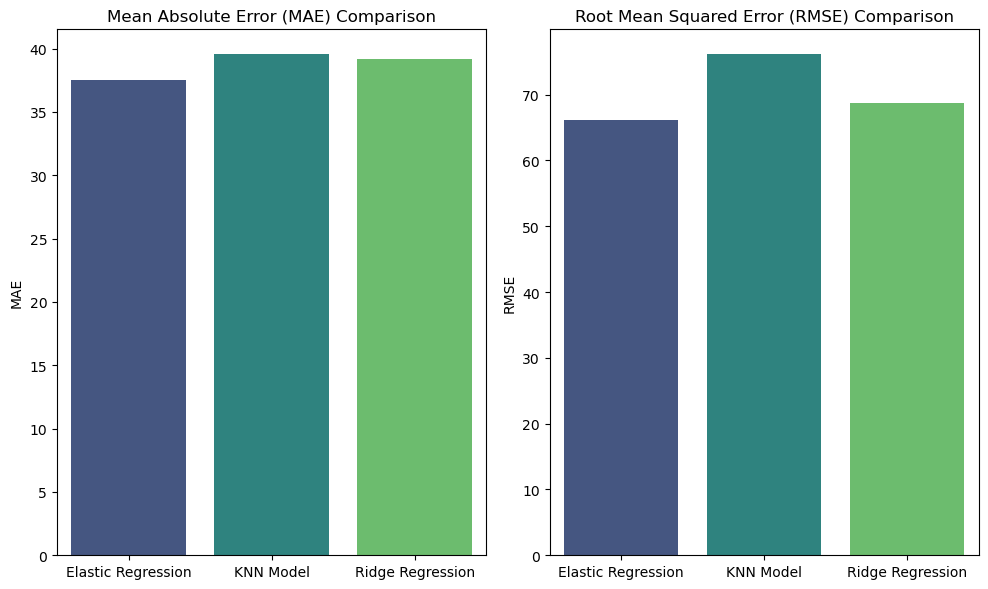

In [43]:
# Create a plot
models = ['Elastic Regression', 'KNN Model', 'Ridge Regression']
mae_scores = [mae_elastic, mae_KNN, mae_ridge]
rmse_scores = [rmse_elastic, rmse_KNN, rmse_ridge]

plt.figure(figsize=(10, 6))

# Plot MAE scores
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mae_scores, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

# Plot RMSE scores
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=rmse_scores, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

Scatter plot of one of the predictions

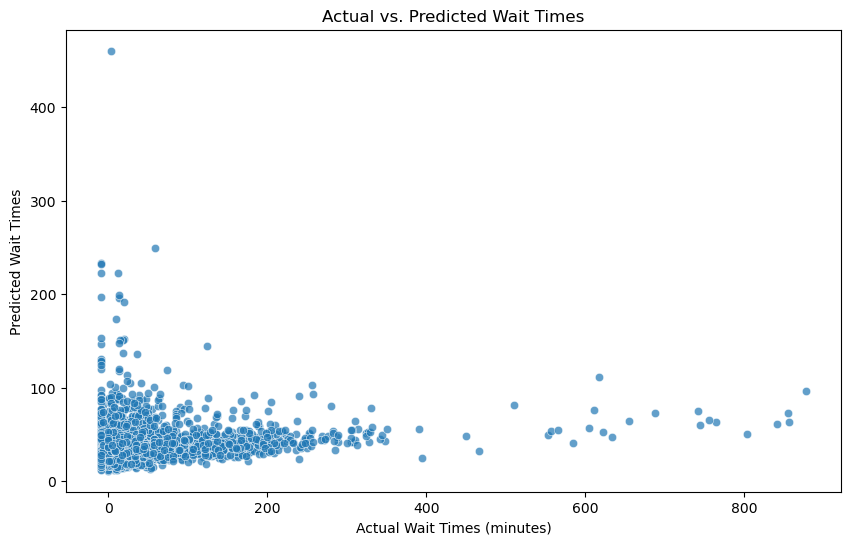

In [44]:
# Assuming y_test contains the actual wait times and predictions contains the predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Wait Times')
plt.xlabel('Actual Wait Times (minutes)')
plt.ylabel('Predicted Wait Times')
plt.show()